# Rental Bikes - Practical Value or Fun?
## by Dirk Henrichmoeller

## Investigation Overview

In this investigation I want to assess the customers rental behavior. The focus will be on the rental behavior of different sexes.

## Dataset Overview

The raw data set can be downloaded [here](https://www.lyft.com/bikes/bay-wheels/system-data).

Since the data comes with one csv-file per month, 12 individual csv-files were downloaded and concatenated (after the structures similarity was validated).
The final preprocessed data set includes all observations from year 2018. It includes 1741556 observations with 14 features. Most features are categorical (some of the date interpretations should be seen as ordinal data). There is only one real numeric type (duration_sec): the duration of the bike rent in seconds. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# set constant global figure size
plt.rcParams['figure.figsize'] = [15, 10]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Helper Functions
def create_ordered_bar_chart(df, qualitative_var_as_string, y_label, percent_label_offset):    
    n_points = df.shape[0]
    max_count = df[qualitative_var_as_string].value_counts().max()
    max_prop = max_count / n_points

    # generate tick mark locations and names
    tick_props = np.arange(0, max_prop, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    # create the plot
    base_color = sb.color_palette()[0]
    var_order = df[qualitative_var_as_string].value_counts().index
    sb.countplot(data = df, x = qualitative_var_as_string, color = base_color, order = var_order[0:20])
    #plt.yticks(tick_props * n_points, tick_names) # comment for absolute occurances on y-axes
    plt.ylabel(y_label)

    var_counts = df[qualitative_var_as_string].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = var_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100 * count / n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count - percent_label_offset, pct_string, ha = 'center', color = 'black')
      
def freq_poly(x, bins = 10, **kwargs): # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2# compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)


In [3]:
# load in the dataset into a pandas dataframe
df_01 = pd.read_csv('201801-fordgobike-tripdata.csv')
df_02 = pd.read_csv('201802-fordgobike-tripdata.csv')
df_03 = pd.read_csv('201803-fordgobike-tripdata.csv')
df_04 = pd.read_csv('201804-fordgobike-tripdata.csv')
df_05 = pd.read_csv('201805-fordgobike-tripdata.csv')
df_06 = pd.read_csv('201806-fordgobike-tripdata.csv')
df_07 = pd.read_csv('201807-fordgobike-tripdata.csv')
df_08 = pd.read_csv('201808-fordgobike-tripdata.csv')
df_09 = pd.read_csv('201809-fordgobike-tripdata.csv')
df_10 = pd.read_csv('201810-fordgobike-tripdata.csv')
df_11 = pd.read_csv('201811-fordgobike-tripdata.csv')
df_12 = pd.read_csv('201812-fordgobike-tripdata.csv')

df = pd.concat([df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12], ignore_index=True)

plt.rcParams['figure.figsize'] = [15, 10]
#convert time containing values to datetime type
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
#create further columns which include different date interpretations
df['start_day_of_week'] = df['start_time'].dt.weekday_name
df['start_hour_of_day'] = df['start_time'].dt.hour
df['start_month_of_year'] = df['start_time'].dt.month
df['end_day_of_week'] = df['end_time'].dt.weekday_name
df['end_hour_of_day'] = df['end_time'].dt.hour

#delete unnecessary columns
df.drop(['start_station_latitude'], axis=1, inplace=True)
df.drop(['start_station_longitude'], axis=1, inplace=True)
df.drop(['end_station_latitude'], axis=1, inplace=True)
df.drop(['end_station_longitude'], axis=1, inplace=True)
df.drop(['start_station_id'], axis=1, inplace=True)
df.drop(['end_station_id'], axis=1, inplace=True)
df.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

#delete rows containing "NaN" values
df.dropna(inplace=True);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Assessing the Size of the Data Set and the Gender Ratio

First lets have a look at the gender distribution of all rental actions.

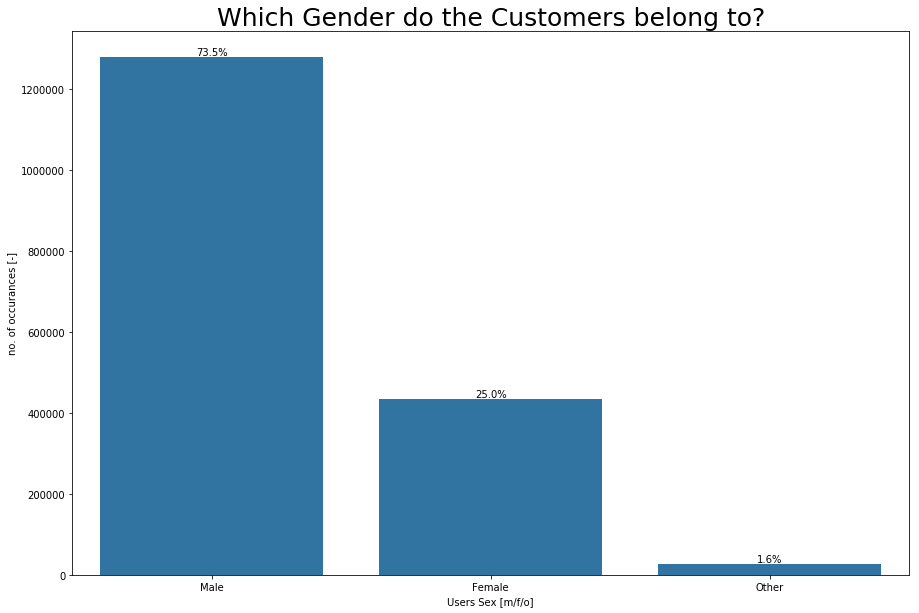

In [4]:
create_ordered_bar_chart(df, 'member_gender', 'no. of occurances [-]', -5000)
plt.xlabel('Users Sex [m/f/o]');
#df['member_gender'].value_counts()
plt.title('Which Gender do the Customers belong to?', size = 25);

It can be seen that approximately 3/4 of all customers are male.

## Identification of Favorite Routes

Let us now look into the most favorite connections the rental customers are choosing.

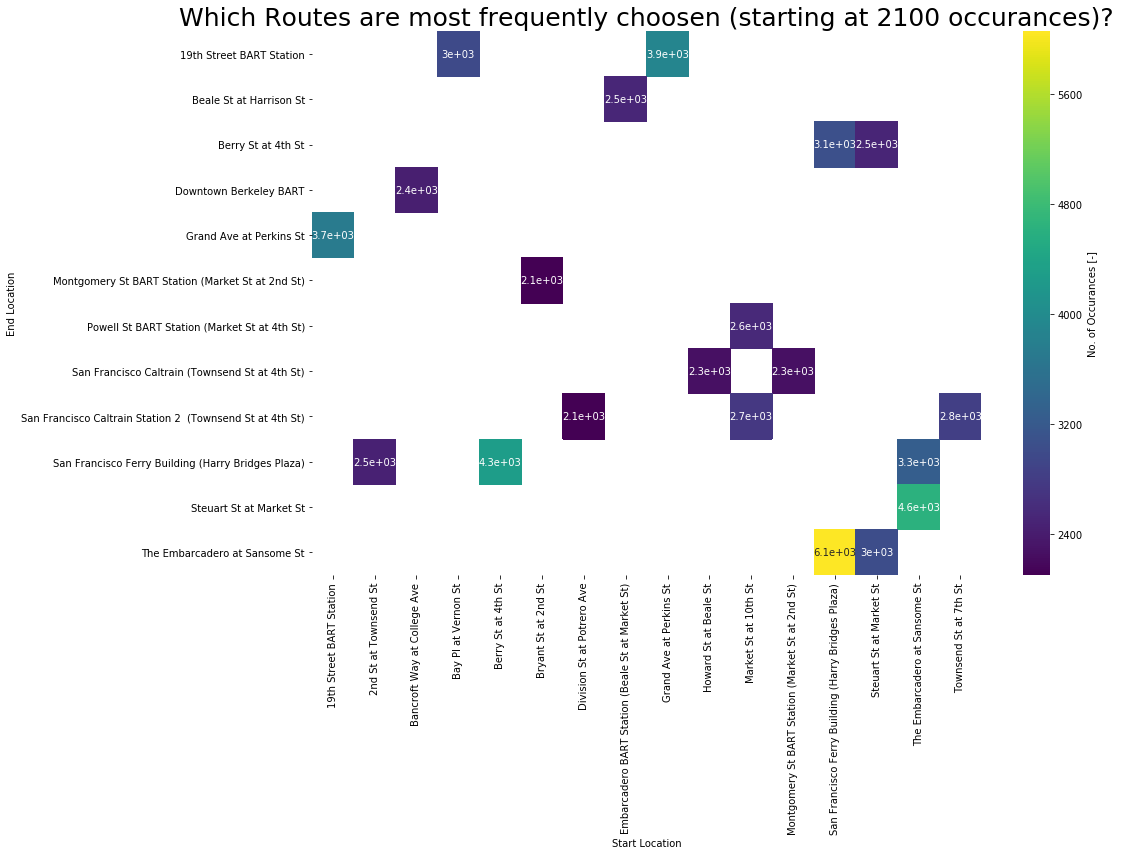

In [5]:
# preconditioning
#print(df['start_station_name'].nunique())
#print(df['end_station_name'].nunique())

filtered = df.groupby(['start_station_name', 'end_station_name']).filter(lambda x: len(x) >= 2100)

ct_counts = filtered.groupby(['start_station_name', 'end_station_name']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'end_station_name', columns = 'start_station_name', values = 'count')

#plotting
sb.heatmap(ct_counts, annot = True, cmap = 'viridis', vmin = 2100, cbar_kws={'label': 'No. of Occurances [-]'});
plt.title('Which Routes are most frequently choosen (starting at 2100 occurances)?', size = 25);
plt.xlabel('Start Location');
plt.ylabel('End Location');

The busiest route starts at "SF Ferry Building" and ends at "The Embarcadero". We can assume that this route brings commuters from the ferry harbour to the next public transportation hub.
Another observation is, that the Matrix is not symmetric. That means that end and start locations are not interchangeble. This means that customers dont always use the same route for their return trip.

## Rental Duration Analysis

Let us have a look at the total rental duration and a specific rental duration on the busiest commuter route:

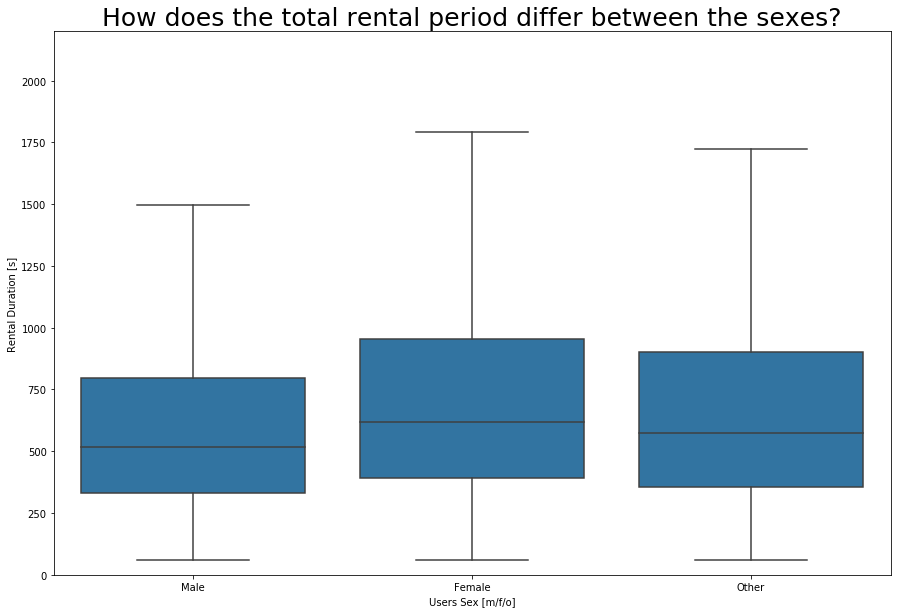

In [6]:
base_color = sb.color_palette()[0];
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color, showfliers=False);
#plt.xticks(rotation = 15);
plt.ylim ([0, 2200]);
plt.xlabel('Users Sex [m/f/o]');
plt.ylabel('Rental Duration [s]');
plt.title('How does the total rental period differ between the sexes?', size = 25);

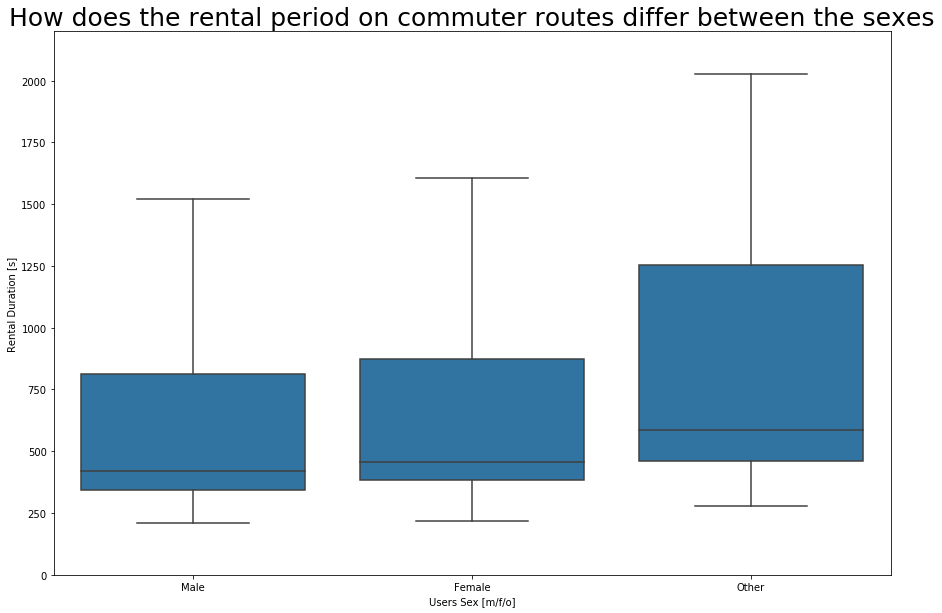

In [7]:
df_new = df.copy()
df_new = df_new[(df_new['start_station_name'] == 'San Francisco Ferry Building (Harry Bridges Plaza)') & (df_new['end_station_name'] == 'The Embarcadero at Sansome St')]
#df_new.head()
base_color = sb.color_palette()[0];
sb.boxplot(data = df_new, x = 'member_gender', y = 'duration_sec', color = base_color, showfliers=False);
#plt.xticks(rotation = 15);
plt.ylim ([0, 2200]);
plt.xlabel('Users Sex [m/f/o]');
plt.ylabel('Rental Duration [s]');
plt.title('How does the rental period on commuter routes differ between the sexes', size = 25);

Turns out that female customers in general have longer rental durations. But looking at commuter routes this difference becomes very small. Where does this difference come from?

## Looking at Weekly Rental Behavior

We will now look at the rental duration depending on the day of the week and the customers gender:

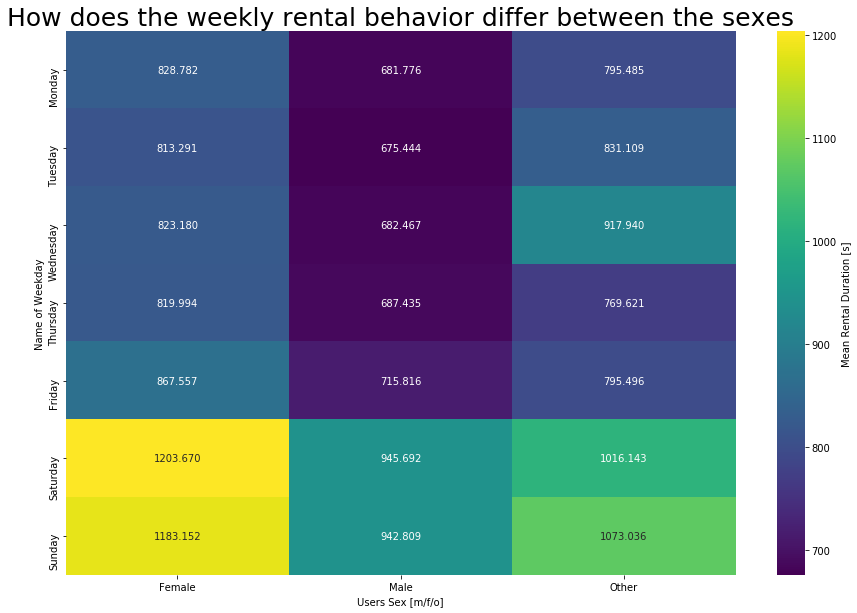

In [8]:
cat_means = df.groupby(['member_gender', 'start_day_of_week']).mean()['duration_sec'];
cat_means = cat_means.reset_index(name = 'num_var2_avg');
cat_means['start_day_of_week'] = pd.Categorical(cat_means['start_day_of_week'], categories = 
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
cat_means = cat_means.pivot(index = 'start_day_of_week', columns = 'member_gender',
                            values = 'num_var2_avg');
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Mean Rental Duration [s]'}, cmap = 'viridis');
plt.xlabel('Users Sex [m/f/o]');
plt.ylabel('Name of Weekday');
plt.title('How does the weekly rental behavior differ between the sexes', size = 25);

## What is the Fundamental Difference?
The increase of rental duration from working days to weekend days is almost twice as high for female customers as for male customers.  
__Female customers seem to focus more on leisure at weekends.__

> From the terminal or command line, I used the following expression to generate the slides:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`